In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [2]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [3]:
data_path = 'log2.csv'

In [4]:
log2_data = pd.read_csv(data_path)

In [5]:
log2_data

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [6]:
for col in log2_data.columns: #convert port columns to string
    if('Port' in col):
        log2_data[col] = log2_data[col].astype(str)

In [7]:
type(log2_data['NAT Destination Port'][0])

str

In [8]:
log2_data.columns

Index(['Source Port', 'Destination Port', 'NAT Source Port',
       'NAT Destination Port', 'Action', 'Bytes', 'Bytes Sent',
       'Bytes Received', 'Packets', 'Elapsed Time (sec)', 'pkts_sent',
       'pkts_received'],
      dtype='object')

In [9]:
log2_OHE = log2_data.copy()
log2_OHE

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [10]:
port_list = ['Source Port','Destination Port','NAT Source Port','NAT Destination Port']
num_vectors = [x for x in log2_OHE.columns if x not in port_list]

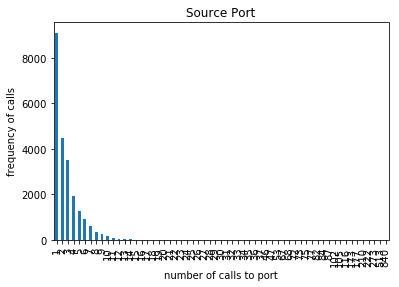

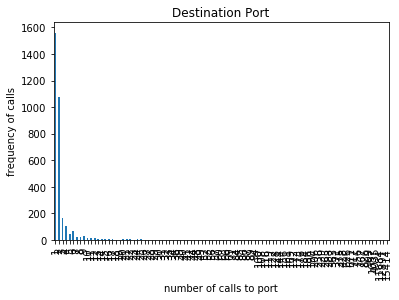

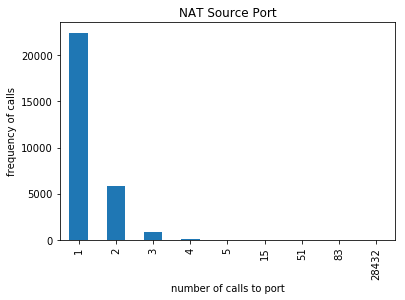

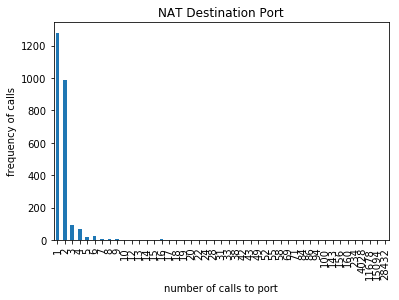

In [11]:
import matplotlib.pyplot as plt

eval_bins = [0,5,10,50,100,200,500,100,999999]
for port in port_list:
    plotter = log2_OHE[port].value_counts()
    fig, ax = plt.subplots()
    plotter.value_counts().sort_index().plot(ax = ax, kind='bar')
    plt.title(port)
    ax.set_xlabel('number of calls to port')
    ax.set_ylabel('frequency of calls')
    plt.show()

In [12]:
for port in port_list:
    mask = log2_OHE[port].map(log2_OHE[port].value_counts()) < 5
    log2_OHE[port] = log2_OHE[port].mask(mask, 'rare')

In [13]:
log2_OHE

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,rare,53,rare,53,allow,177,94,83,2,30,1,1
1,56258,3389,rare,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,rare,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,rare,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,rare,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,rare,80,rare,80,allow,314,192,122,6,15,4,2
65528,rare,80,rare,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,rare,445,0,0,drop,70,70,0,1,0,1,0
65530,rare,445,0,0,drop,70,70,0,1,0,1,0


In [14]:
log2_OHE = pd.get_dummies(log2_OHE, columns=port_list, drop_first=True)

In [15]:
log2_OHE

,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_10003,Source Port_10006,...,NAT Destination Port_8100,NAT Destination Port_8245,NAT Destination Port_8434,NAT Destination Port_8525,NAT Destination Port_8635,NAT Destination Port_867,NAT Destination Port_8765,NAT Destination Port_8999,NAT Destination Port_993,NAT Destination Port_rare
0,allow,177,94,83,2,30,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,allow,4768,1600,3168,19,17,10,9,0,0,...,0,0,0,0,0,0,0,0,0,0
2,allow,238,118,120,2,1199,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,allow,3327,1438,1889,15,17,8,7,0,0,...,0,0,0,0,0,0,0,0,0,0
4,allow,25358,6778,18580,31,16,13,18,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,allow,314,192,122,6,15,4,2,0,0,...,0,0,0,0,0,0,0,0,0,0
65528,allow,4680740,67312,4613428,4675,77,985,3690,0,0,...,0,0,0,0,0,0,0,0,0,0
65529,drop,70,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65530,drop,70,70,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
del num_vectors[0]
num_vectors

['Bytes',
 'Bytes Sent',
 'Bytes Received',
 'Packets',
 'Elapsed Time (sec)',
 'pkts_sent',
 'pkts_received']

In [17]:
x_data = log2_OHE.iloc[:, 1:]
y_data = log2_OHE.iloc[:, 0]

In [18]:
x_data

,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_10003,Source Port_10006,Source Port_10151,...,NAT Destination Port_8100,NAT Destination Port_8245,NAT Destination Port_8434,NAT Destination Port_8525,NAT Destination Port_8635,NAT Destination Port_867,NAT Destination Port_8765,NAT Destination Port_8999,NAT Destination Port_993,NAT Destination Port_rare
0,177,94,83,2,30,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4768,1600,3168,19,17,10,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,238,118,120,2,1199,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3327,1438,1889,15,17,8,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,25358,6778,18580,31,16,13,18,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65527,314,192,122,6,15,4,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65528,4680740,67312,4613428,4675,77,985,3690,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65529,70,70,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65530,70,70,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_data.value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [20]:
y_data.loc[y_data != 'allow'] = 'deny'
y_data.value_counts()

/hpc/applications/anaconda/3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


allow    37640
deny     27892
Name: Action, dtype: int64

In [21]:
# Setting allow as positive case
y_data.loc[y_data == 'allow'] = 1
y_data.loc[y_data == 'deny'] = 0

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=192)

In [23]:
print(x_train.shape)

scale = np.logspace(3, np.log10(x_train.shape[0]), 10)
scale = [int(item) for item in scale]
scale

(52425, 4253)


[1000, 1552, 2410, 3742, 5810, 9021, 14007, 21747, 33765, 52425]

In [24]:
import time

time_logger = {}
for i in scale:
    svc = LinearSVC(max_iter=50000)
    begin = time.time()
    svc.fit(x_train.iloc[:i, :], y_train.iloc[:i])
    time_logger[i] = (time.time() - begin)

In [25]:
from pprint import pprint
pprint(time_logger)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vectors

['Bytes',
 'Bytes Sent',
 'Bytes Received',
 'Packets',
 'Elapsed Time (sec)',
 'pkts_sent',
 'pkts_received']

In [27]:
x_train[num_vectors] = scaler.fit_transform(x_train[num_vectors])
x_train

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/hpc/applications/anaconda/3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_10003,Source Port_10006,Source Port_10151,...,NAT Destination Port_8100,NAT Destination Port_8245,NAT Destination Port_8434,NAT Destination Port_8525,NAT Destination Port_8635,NAT Destination Port_867,NAT Destination Port_8765,NAT Destination Port_8999,NAT Destination Port_993,NAT Destination Port_rare
49465,-0.017059,-0.006331,-0.029727,-0.019489,-0.017237,-0.012501,-0.027077,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61832,0.027587,-0.004252,0.071284,0.035262,0.022892,0.019238,0.053960,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58629,-0.017064,-0.006339,-0.029727,-0.019489,-0.217879,-0.012501,-0.027077,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34523,-0.017065,-0.006340,-0.029727,-0.019489,-0.217879,-0.012501,-0.027077,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33739,-0.017044,-0.006332,-0.029691,-0.019314,-0.107526,-0.012501,-0.026668,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20288,-0.017052,-0.006321,-0.029727,-0.019489,-0.217879,-0.012501,-0.027077,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24964,-0.016955,-0.006333,-0.029481,-0.019314,-0.114214,-0.012501,-0.026668,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59916,-0.017024,-0.006281,-0.029727,-0.018787,-0.217879,-0.011387,-0.027077,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10494,-0.016981,-0.006217,-0.029727,-0.019489,-0.217879,-0.012501,-0.027077,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
x_train.shape

(52425, 4253)

In [29]:
x_tune_set, x_remainder, y_tune_set, y_remainder = train_test_split(x_train, y_train, train_size=0.2,
                                                                    stratify=y_train, random_state=12)

In [30]:
x_tune_set.shape

(10485, 4253)

In [31]:
y_tune_set.value_counts()

1    6022
0    4463
Name: Action, dtype: int64

In [32]:
y_test.value_counts()

1    7528
0    5579
Name: Action, dtype: int64

In [33]:
x_test[num_vectors] = scaler.fit_transform(x_test[num_vectors])
x_test

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/hpc/applications/anaconda/3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Source Port_10003,Source Port_10006,Source Port_10151,...,NAT Destination Port_8100,NAT Destination Port_8245,NAT Destination Port_8434,NAT Destination Port_8525,NAT Destination Port_8635,NAT Destination Port_867,NAT Destination Port_8765,NAT Destination Port_8999,NAT Destination Port_993,NAT Destination Port_rare
49991,-0.043174,-0.056034,-0.041947,-0.047924,-0.217098,-0.049848,-0.046692,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38448,-0.025446,-0.029465,-0.024869,-0.020685,0.473310,-0.016465,-0.022636,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3455,-0.043068,-0.055376,-0.041865,-0.047188,-0.122088,-0.049848,-0.045599,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16505,-0.043177,-0.056107,-0.041947,-0.047924,-0.217098,-0.049848,-0.046692,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45841,-0.043087,-0.055522,-0.041879,-0.047188,-0.122088,-0.049848,-0.045599,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46295,-0.043065,-0.055229,-0.041869,-0.047188,-0.122088,-0.049848,-0.045599,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48256,-0.042570,-0.054936,-0.041373,-0.047188,-0.122088,-0.049848,-0.045599,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65005,-0.043177,-0.056107,-0.041947,-0.047924,-0.217098,-0.049848,-0.046692,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15398,-0.043177,-0.056107,-0.041947,-0.047924,-0.217098,-0.049848,-0.046692,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# SVM Section: Don't Run unless on HPC

In [34]:
kernels = ["linear","poly", "rbf", "sigmoid"]
svcs = [SVC(kernel=k, cache_size=8000) for k in kernels]
model_dict = {k:v for k,v in zip(kernels,svcs)}

time_logger = {}
for v in model_dict.values():
    begin = time.time()
    v.fit(x_tune_set, y_tune_set)
    time_logger[v] = (time.time() - begin)
    print(time_logger[v])

23.551230430603027
122.55636692047119
49.24397253990173
42.47865867614746


In [35]:
params = {'C': np.logspace(-5,5,40),
          'class_weight': [None, 'weighted'],
          'random_state': [415]}

In [36]:
del model_dict['sigmoid'] #dropping poly due to time constraints

In [37]:
model_dict

{'linear': SVC(C=1.0, break_ties=False, cache_size=8000, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'poly': SVC(C=1.0, break_ties=False, cache_size=8000, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False),
 'rbf': SVC(C=1.0, break_ties=False, cache_size=8000, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False)}

In [38]:
param_tune = {}
begin = time.time()
for kernel, mdl in model_dict.items():
    g_search = RandomizedSearchCV(mdl,
                                  param_distributions=params,
                                  n_iter=20,
                                  n_jobs=48,
                                  cv=3,
                                  random_state=903,
                                  scoring='f1')
        
    g_search.fit(x_tune_set, y_tune_set)
    param_tune[mdl] = [g_search.best_estimator_,
                       g_search.best_score_,
                       g_search.cv_results_]
        
    print(kernel, ' finished in ', g_search.cv_results_['mean_score_time'].sum().round(2))
    
print('total time to tune models', round((time.time()-begin),2))

linear  finished in  133.22
poly  finished in  344.45
rbf  finished in  327.91
total time to tune models 1144.87


In [39]:
param_tune

{SVC(C=1.0, break_ties=False, cache_size=8000, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False): [SVC(C=1603.7187437513276, break_ties=False, cache_size=8000, class_weight=None,
      coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
      kernel='linear', max_iter=-1, probability=False, random_state=415,
      shrinking=True, tol=0.001, verbose=False),
  0.9990860543423353,
  {'mean_fit_time': array([  1.93369857,  20.51721867,   1.84935093,   1.55962022,
          163.96635008,  18.54803109,   1.71441952,   1.91204309,
            2.41894643,  19.01957949,   2.43823663,   3.35195963,
           40.38355199,   3.18785803,   3.14677501,  79.84891582,
            1.97996132,   1.86616286,   1.6650931 ,  20.11917965]),
   'std_fit_time': array([0.17943812, 6.39779301, 0.26860113, 0.07346659, 6.16149677,
        

In [40]:
from tabulate import tabulate
print(tabulate([['Model','Training Time'],
                ['Linear',232.48],
                ['Poly',429.83],
                ['RBF',374.06]],
              headers='firstrow',
              tablefmt='fancy_grid'))

╒═════════╤═════════════════╕
│ Model   │   Training Time │
╞═════════╪═════════════════╡
│ Linear  │          232.48 │
├─────────┼─────────────────┤
│ Poly    │          429.83 │
├─────────┼─────────────────┤
│ RBF     │          374.06 │
╘═════════╧═════════════════╛


In [41]:
# this prints the model so we don't need to run this multiple times
with open('best_SVMs.txt', 'w') as f: 
    for key, value in param_tune.items():
        f.write('%s:%s\n'%(key, value))

In [42]:
tuned_SVCs = []
i=0

for k in param_tune:
    tuned_SVCs.append(param_tune[k][0])
    print('F1 score for {} was {}'.format(list(model_dict.keys())[i], param_tune[k][1].round(5)))
    i += 1
          
tuned_SVCs

F1 score for linear was 0.99909
F1 score for poly was 0.997
F1 score for rbf was 0.99842


[SVC(C=1603.7187437513276, break_ties=False, cache_size=8000, class_weight=None,
     coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
     kernel='linear', max_iter=-1, probability=False, random_state=415,
     shrinking=True, tol=0.001, verbose=False),
 SVC(C=492.38826317067316, break_ties=False, cache_size=8000, class_weight=None,
     coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
     kernel='poly', max_iter=-1, probability=False, random_state=415,
     shrinking=True, tol=0.001, verbose=False),
 SVC(C=1603.7187437513276, break_ties=False, cache_size=8000, class_weight=None,
     coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
     kernel='rbf', max_iter=-1, probability=False, random_state=415,
     shrinking=True, tol=0.001, verbose=False)]

In [43]:
y_preds = []

for j, svc in enumerate(tuned_SVCs):
    begin = time.time()
    svc.fit(x_train, y_train)
    y_preds.append(svc.predict(x_test))
    print('done with model {} in {}'.format(j+1,round(time.time()-begin,2)))
    
print('time to train & predict with tuned models',time.time() - begin)

In [44]:
y_preds[0]

In [45]:
cm = confusion_matrix(y_test, y_preds[0])

font = {'size'   : 13}
plt.rc('font', **font)

c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray(['deny','allow']))
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor SVM (linear kernel)\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Oranges, ax=ax, values_format='')

In [46]:
cm = confusion_matrix(y_test, y_preds[1])

font = {'size'   : 13}
plt.rc('font', **font)

c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray(['deny','allow']))
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor SVM (poly kernel)\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Oranges, ax=ax, values_format='')

In [47]:
cm = confusion_matrix(y_test, y_preds[2])

font = {'size'   : 13}
plt.rc('font', **font)

c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray(['deny','allow']))
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor SVM (rbf kernel)\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Oranges, ax=ax, values_format='')

## Add this to show Random State issues

In [48]:
rands = np.linspace(20,80,3)
rands = [int(x) for x in rands]
x_train_lists = []
x_test_lists = []
y_train_lists = []
y_test_lists = []

for r in rands:
    x_Tr, x_Te, y_Tr, y_Te = train_test_split(x_data, y_data, test_size=0.2, stratify=y_data, random_state=r)
    x_Tr[num_vectors] = scaler.fit_transform(x_Tr[num_vectors])
    x_Te[num_vectors] = scaler.fit_transform(x_Te[num_vectors])
    
    x_train_lists.append(x_Tr)
    x_test_lists.append(x_Te)
    y_train_lists.append(y_Tr)
    y_test_lists.append(y_Te)

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/hpc/applications/anaconda/3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [49]:
len(x_train_lists)

3

In [50]:
from sklearn.metrics import f1_score
poly_F1 = []
rbf_F1 = []

for i in range(len(x_train_lists)):
    begin = time.time()
    poly = tuned_SVCs[1]
    rbf = tuned_SVCs[2]
    poly.fit(x_train_lists[i], y_train_lists[i])
    rbf.fit(x_train_lists[i], y_train_lists[i])
    
    poly_preds = poly.predict(x_test_lists[i])
    rbf_preds = rbf.predict(x_test_lists[i])
    
    poly_F1.append(f1_score(y_test_lists[i], poly_preds))
    rbf_F1.append(f1_score(y_test_lists[i], rbf_preds))
    print('Done with random set ', i+1, 'in ', (time.time()-begin))

Done with random set  1 in  1213.3933894634247
Done with random set  2 in  1406.3799364566803
Done with random set  3 in  1472.1524810791016


In [53]:
rbf_F1

[0.9986032590621882, 0.998336991951041, 0.9987364500897786]

In [54]:
f1_rands = pd.DataFrame.from_dict({'poly kernel': poly_F1,
                                  'rbf kernel': rbf_F1})

In [60]:
max_rands = f1_rands.max()
print(max_rands)

poly kernel    0.998271
rbf kernel     0.998736
dtype: float64


In [66]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background: #ffff7d' if cell else '' for cell in is_max]

pd.set_option('precision',6)
f1_rands.style.apply(highlight_max)

,poly kernel,rbf kernel
0,0.998271,0.998603
1,0.997937,0.998337
2,0.997739,0.998736


# SGD Classifier Section

In [67]:
sgd_hyps = {'loss':['hinge', 'modified_huber', 'squared_hinge', 'perceptron',
                    'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            'alpha':np.logspace(-8,8,100),
            'fit_intercept':[True, False],
            'tol':np.logspace(-8,-2,7),
            'epsilon':np.logspace(-4,4,9),
            'learning_rate':['optimal','constant','invscaling','adaptive'],
            'eta0':np.logspace(-3,9,13),
            'power_t':[x + 0.5 for x in np.linspace(-10000,10000,21)],
            'validation_fraction':[0.2],
            'n_iter_no_change':[5],
            'class_weight':[None,'balanced']           
}

In [68]:
sgdc = SGDClassifier(max_iter=10000, penalty='l2', fit_intercept=True, n_jobs=48, random_state=162)

In [ ]:
gd_search = RandomizedSearchCV(sgdc,
                               param_distributions=sgd_hyps,
                               n_iter=100,
                               n_jobs=48,
                               cv=5,
                               random_state=111,
                               scoring='f1')
        
gd_search.fit(x_tune_set, y_tune_set)

In [ ]:
best_sgdc = gd_search.best_estimator_
print('f1 score:\t\t\t',gd_search.best_score_)
print('time to fit individual model:\t',gd_search.cv_results_['mean_score_time'].sum().round(2))
print(best_sgdc,'\n')
print(gd_search.cv_results_)

In [ ]:
begin = time.time()
best_sgdc.fit(x_train, y_train)
sgdc_preds = best_sgdc.predict(x_test)
print('time to train & predict with tuned model',time.time() - begin)

best_sgdc.score(x_train, y_train) #checking internal scoring against 5-fold scoring done during hyperparameter tuning

In [ ]:
cm = confusion_matrix(y_test, sgdc_preds)

font = {'size'   : 13}
plt.rc('font', **font)

c_disp = ConfusionMatrixDisplay(cm, display_labels=np.asarray(['deny','allow']))
fig, ax = plt.subplots(figsize=(5,5))
ax.grid(False)
plt.title('Confusion Matrix\nfor SGD classifier\n', fontsize=14)
c_disp.plot(cmap=plt.cm.Oranges, ax=ax, values_format='')